<a href="https://colab.research.google.com/github/Akhil8252/pytorch_learning/blob/main/002_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### *follow "https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb"

In [25]:
what_were_covering = {1: "data(prepare and load)",
                                        2: "build model",
                                        3: "fitting the model to the data (training)",
                                        4: "making predictions and evaluating a model(inference)",
                                        5:"saving and loading a model",
                                        6: " putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: ' putting it all together'}

In [26]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
# follow pytorch documentation
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.1.0+cu121'

####step : 1
* data preparation and loading
        data can be almost anything in machine learning
                     excel spreadsheet
                     Images of any kind
                     videos (youtube has lots of data)
                     Audio (speeches)
                     DNA
                     Text
* Machine learning is a game of two parts
-- get data into a numerical representation
-- build a model to study the pattern in that numerical  representation

* to showcase this, let's create some *known* data using the linear regression formula
* we will use formula of linear regression formula to make a straight line with *known* **parameters**


In [27]:
#create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)# to make it a two dimensional tensor
print(X[:5])
print(X.shape)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
torch.Size([50, 1])


In [28]:
y = weight*X+bias
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

In [29]:
len(X),len(y)

(50, 50)

##### splitting data into train and test sets
 `training set : - 60 to 80% ⏩ Always done`

`validation set :- 10 to 20% ⏩ often but not always`

`test set : - 10 to 20% ⏩always done `

let's create a training set and test set

In [30]:
train_split = int(len(X)*0.8)

X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

In [31]:
len(X_train) ,len (y_train),len(X_test) ,len (y_test)

(40, 40, 10, 10)

how might we better visualize the data , this is where data exploration comes into picture

In [32]:
def plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels = y_test,predictions = None) :
  """
   plot training data and test data and compare predictions
  """
  plt.figure(figsize =(10,7) )
  #plot training data
  plt.scatter(train_data,train_labels,c = 'r',marker = '*', label = "training data", s = 50)
  plt.scatter(test_data,test_labels,c = 'g', marker = '.', label = "test data", s = 50)
  plt.legend()
  plt.show()


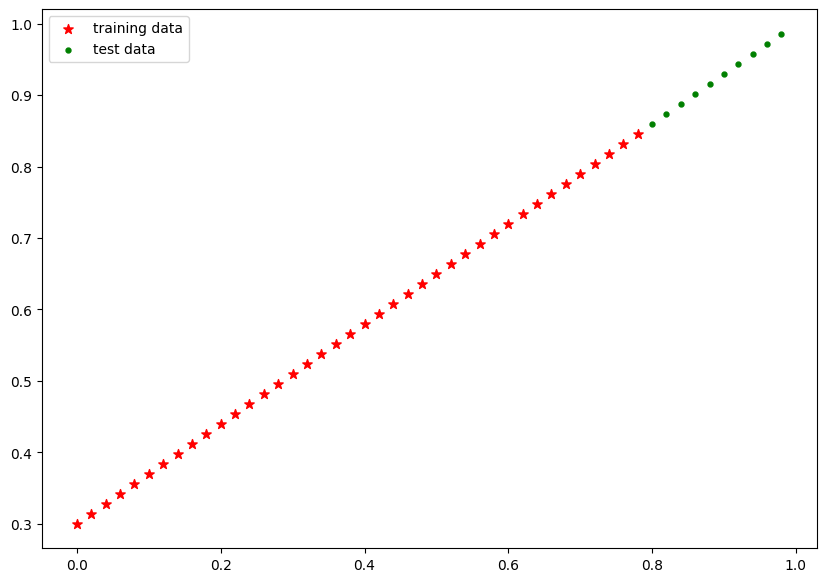

In [33]:
plot_prediction(X_train,y_train,X_test,y_test)

building 1st pytorch linear regression model

In [34]:
from torch import nn
class linearRegression(nn.Module): # -> almost every class in pytorch inherits from nn class
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,  requires_grad = True, dtype = torch.float ))# randn has been used for random number generating from normal distribution having mean 0 and std dev 1.

    self.bias = nn.Parameter(torch.randn(1,  requires_grad = True, dtype = torch.float ))

  def forward(self, x:torch.Tensor)  ->torch.Tensor :  #"x" is the input data
    return self.weight*x+self.bias #this is the linear regression formula



In [35]:
lr = linearRegression()
lr.forward(X_train),y_train

(tensor([[-0.1863],
         [-0.2088],
         [-0.2312],
         [-0.2537],
         [-0.2762],
         [-0.2986],
         [-0.3211],
         [-0.3435],
         [-0.3660],
         [-0.3884],
         [-0.4109],
         [-0.4334],
         [-0.4558],
         [-0.4783],
         [-0.5007],
         [-0.5232],
         [-0.5456],
         [-0.5681],
         [-0.5906],
         [-0.6130],
         [-0.6355],
         [-0.6579],
         [-0.6804],
         [-0.7028],
         [-0.7253],
         [-0.7478],
         [-0.7702],
         [-0.7927],
         [-0.8151],
         [-0.8376],
         [-0.8600],
         [-0.8825],
         [-0.9050],
         [-0.9274],
         [-0.9499],
         [-0.9723],
         [-0.9948],
         [-1.0172],
         [-1.0397],
         [-1.0622]], grad_fn=<AddBackward0>),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
   

### what our model does is :
 - start with random values(weight and bias)
 - look at the training data and adjust the random values to better represent (or get closer to ) the ideal values(weight and biases used to creat the data)

### how does it do so?
 - through two main algo:
 1. Gradient descent
 2. Backpropafation

#### pytorch model building essentials

* torch.nn: - contains all of the buildings for computational graphs(a neural network can be considered a computational graphs)
* torch.nn.Parameter :- what parameter should the model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module : -  base class for all neural network module(if we subclass it , we should overwrite forward method)
* torch.optim :- this contains the optimizers which helps in gradient descent
* torch.utils.data.dataset :- represents a map between key (label) and sample(fetaures)pairs of your data. such as images and their associated labels


`follow pytorch cheat sheet`
"https://pytorch.org/tutorials/beginner/ptcheat.html"

#### checking the contents of our pytorch model
- we can check our model parameter or what's inside our model using `.parameters()`

In [36]:
#create a random seed
torch.manual_seed(42)

# create an instance of the model(tis is a subclass of the nn.Module)
model = linearRegression()
#check out the parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [38]:
weight,bias

(0.7, 0.3)

#### let's make predictions using `torch.inference_mode()`
*To check our model's prediction accuracy , let's ee how well it predicts the y_test based on X_test
* when we pass the data through the model in `forward` function, this will make some inferences.

In [39]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [40]:
# Make predictions with models

with torch.inference_mode():
    y_preds = model(X_test)

# we can also do same thing using torch.no_grad(), however inference_mode() is preferred

with torch.no_grad():
    y_pred = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

* InferenceMode is a new context manager analogous to no_grad to be used when you are certain your operations will have no interactions with autograd (e.g., model training). Code run under this mode gets better performance by disabling view tracking and version counter bumps. Note that unlike some other mechanisms that locally enable or disable grad, entering inference_mode also disables to forward-mode AD.

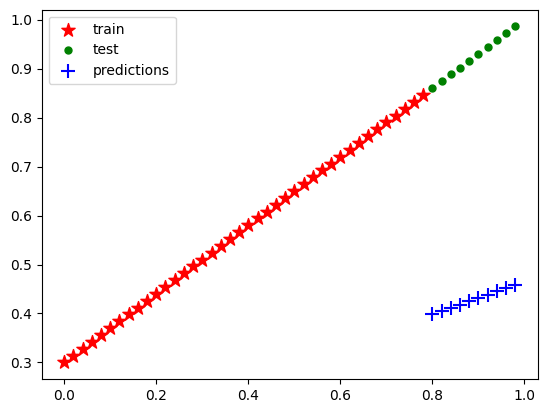

In [58]:
plt.scatter(X_train,y_train,c = 'r',marker = '*',s = 100,label = "train")
plt.scatter(X_test,y_test,c = 'g',marker = '.',s = 100,label = "test")
plt.scatter(X_test,y_preds,c = 'b',marker = '+',s = 100,label="predictions")
plt.legend(loc = 2)
plt.show()

#### Training a model, simply means move the model from some unknown parameters(may be random no) to some known parameters
* movement is based on how mush the trained model is deviating from the actual model. i.e finding the error

* follow "Torch.nn->cost function in official documentation"

* loss function is also called "cost function or criterion"

* Loss function :- A function to measure the deviation of predicted result from actual result

* optimizers:-Takes into the account, the loss of a model and adjust the model's parameters(e.g weight and bias in your case) to improve the loss function and

specifically for pytorch we need:
* a training loop
* a test loop


In [60]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [62]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### follow this for loss function in pytorch "https://pytorch.org/docs/stable/nn.html#loss-functions"
#### follow this for loss function in pytorch"https://pytorch.org/docs/stable/optim.html"

#### MAE_loss = torch.mean(torch.abs(y_pred-y_test)) or
#### MAE_loss = torch.nn.L1Loss()

In [77]:
#setup a loss function

loss_fn = nn.L1Loss()

# setup an optimizers(schochastic gradient descent)
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.01)#lr = learning rate

RuntimeError: Boolean value of Tensor with more than one value is ambiguous